In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression

#from nose.tools import *

#from mpl_toolkits.basemap import Basemap

#import networkx as nx

#from datetime import datetime

## Health and economics indicators of the life quality of European Union countries for the last 20 years

### Author: Svetla Tsvetkova

#### Problem 1 - Economics indicators

Nowadays, European Union (EU) contains 28 member countrie. 

The first european countries, which started to cooperate economically, were Belgium, Germany, France, Italy, Luxembourg and the Netherlands during 1951. Over time, more countries decided to join the EU:
- 1973 - Denmark, Ireland, United Kingdom
- 1981 - Greece
- 1986 - Portugal, Spain
- 1995 - Austria, Finland, Sweedan
- 2004 - Estonia, Cyprus, Latvia, Lithuania, Malta, Poland, Slovakia, Slovenia, Hungary, Czech Republic
- 2007 - Bulgaria, Romania
- 2013 - Croatia

The purpose of this study is to see how these contries develope with time. The interval of years which was choosen is between 1996 to nowadays. For some of the datasets the interval is shorter, but this fact will be taken into account when compare variables from different datasets. Unfortunately, there are no data for Slovakia in any of the datasets, so this name will be omitted from the list with names of EU countries. A couple of countries present fully/almost empty rows in one or two datasets, but there are data in other ones. Their names are not deleted in the current tables, because this will change the order of colors and line styles in the presented figures - every country has its own color and line style in every figure and this makes the plots easily readable for the reader.

The datasets, which are used, are as follows:
- gdp_per_capita.xlsx
- carbon_dioxide_emissions_per_capita.xlsx
- coal_consumption_per_capita.xlsx
- total_health_expenditure_gdp_pct.xlsx
- suicide_per_10k.xlsx

The second question, which will be interested to examine, is whether there is an influence (hope to be positive) over the environment and people health of the countries after their joining to the EU. If that so, maybe, this could be due to the EU regulations and laws.

The next 6 cells just present the import of tha data from the mentioned above 5 excel tables and presenting them as dataframes, choosing the index column to be the country name column and making it as an index of the dataframe with a proper title, selecting the list with country names and time interval to be studied.

In [6]:
# The list with names of EU countries
names_countries_EU = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovenia", "Spain", "Sweden", "United Kingdom"]

In [7]:
gdp = pd.read_excel("1. EconomicsAndDemographics/gdp_per_capita.xlsx")
gdp = gdp.rename(columns = {'GDP per capita':'country'})
gdp = gdp.set_index('country')
gdp = gdp.loc[names_countries_EU]

gdp = gdp[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]
gdp

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,
Austria,34237.0,34952.0,36157.0,37382.0,38548.0,38919.0,39370.0,39475.0,40292.0,40875.0,42036.0,43418.0,43952.0,42171.0,42861.0,44029.0,44216.0,44059.0,43906.0,44401.0
Belgium,33217.0,34377.0,34992.0,36209.0,37404.0,37620.0,38036.0,38214.0,39356.0,39881.0,40661.0,41575.0,41641.0,40225.0,40764.0,40946.0,40687.0,40607.0,40885.0,41240.0
Bulgaria,8659.0,8617.0,8976.0,8516.0,9075.0,9596.0,10220.0,10829.0,11602.0,12359.0,13228.0,14430.0,15368.0,14692.0,14886.0,15278.0,15443.0,15695.0,16048.0,16371.0
Croatia,13797.0,14463.0,14965.0,14652.0,15644.0,16130.0,16977.0,17920.0,18656.0,19420.0,20358.0,21426.0,21873.0,20283.0,19989.0,20571.0,20183.0,20049.0,20060.0,20260.0
Cyprus,26450.0,26704.0,27721.0,28698.0,30005.0,30745.0,31373.0,31858.0,32812.0,33592.0,34528.0,35455.0,35828.0,34166.0,33747.0,32983.0,31710.0,30081.0,29673.0,29797.0
Czech Republic,19934.0,19821.0,19777.0,20082.0,21003.0,21726.0,22126.0,22930.0,24057.0,25571.0,27256.0,28595.0,29128.0,27560.0,28111.0,28603.0,28333.0,28124.0,28695.0,29437.0
Denmark,37521.0,38584.0,39297.0,40321.0,41693.0,41886.0,41947.0,41996.0,42993.0,43919.0,45437.0,45609.0,45017.0,42498.0,42997.0,43314.0,42869.0,42483.0,42777.0,43495.0
Estonia,11245.0,12709.0,13705.0,13723.0,14877.0,15894.0,16974.0,18359.0,19665.0,21651.0,24047.0,26066.0,24743.0,21137.0,21710.0,23576.0,24761.0,25254.0,25865.0,26812.0
Finland,28210.0,29884.0,31423.0,32743.0,34517.0,35327.0,35834.0,36461.0,37783.0,38700.0,40115.0,42016.0,42122.0,38455.0,39425.0,40251.0,39489.0,38788.0,38569.0,38923.0


In [8]:
CO2 = pd.read_excel("1. EconomicsAndDemographics/carbon_dioxide_emissions_per_capita.xlsx")
CO2 = CO2.rename(columns = {'CO2 per capita':'country'})
CO2 = CO2.set_index('country')
CO2 = CO2.loc[names_countries_EU]

CO2 = CO2[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]]
CO2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
country,,,,,,,,,,,,,,,,,
Austria,7.916498,8.015418,8.219538,7.989369,7.956564,8.174472,8.310385,8.889629,8.778800,9.017238,8.649446,8.319712,8.183160,7.438353,7.969244,7.606392,7.095971
Belgium,11.845091,11.498088,11.766027,11.414016,11.370046,11.238145,10.485769,11.144728,10.743691,10.419898,10.198066,9.792963,9.797337,9.772561,10.169529,9.513115,9.194220
Bulgaria,6.836044,6.295676,6.026112,5.451565,5.436690,5.844329,5.654701,6.033541,6.006152,6.189984,6.364376,6.911699,6.690139,5.674513,5.961127,6.722385,6.153028
Croatia,3.976344,4.171324,4.454975,4.513027,4.359603,4.621766,4.898180,5.282069,5.179208,5.201202,5.226528,5.509947,5.287903,4.886269,4.742244,NaN,NaN
Cyprus,6.600426,6.606733,7.038089,6.996548,7.261080,7.119911,7.165887,7.762151,7.219226,7.265423,7.429369,7.709117,7.942735,7.464651,6.983513,NaN,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,13.052944,10.809832,10.578688,9.571741,8.850265,9.154250,9.172629,10.350042,9.368527,8.689944,10.105383,9.187567,8.541508,8.054241,8.341949,7.430455,6.561125
Estonia,12.639519,12.503670,11.872243,11.077358,11.074238,11.442670,11.008292,12.611367,12.766519,12.466902,12.044550,14.031856,13.031379,10.989377,13.672696,NaN,NaN
Finland,11.956140,11.672245,11.062590,10.735772,10.077828,10.880818,11.750705,13.219604,12.836677,10.418975,12.569592,12.092777,10.644114,9.952737,11.527226,9.892573,8.860442


In [9]:
coal = pd.read_excel("1. EconomicsAndDemographics/coal_consumption_per_capita.xlsx")
coal = coal.rename(columns = {'Coal Consumption per person (tonnes oil equivalent)':'country'})
coal = coal.set_index('country')
coal = coal.loc[names_countries_EU]

coal = coal[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]]
coal

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,
Austria,0.372717,0.387001,0.345030,0.348291,0.353667,0.383157,0.369167,0.406676,0.398385,0.371590,0.372528,0.357169,0.336018,0.271218,0.307256,0.294178
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bulgaria,0.921913,0.944498,0.903535,0.791244,0.800384,0.893837,0.828617,0.920650,0.916399,0.882917,0.891083,1.003104,0.989551,0.843467,0.909754,1.133418
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Czech Republic,2.292916,2.211930,1.994512,1.852571,2.046200,2.071741,2.018218,2.034546,2.047901,1.997136,2.052678,2.059335,1.913589,1.665081,1.730112,1.819550
Denmark,1.703071,1.271418,1.057995,0.888640,0.754565,0.781919,0.781490,1.055625,0.848104,0.680144,1.033868,0.863757,0.746365,0.722188,0.683586,0.576177
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finland,0.976747,0.874251,0.637737,0.631926,0.633823,0.744429,0.797336,1.057269,0.965544,0.558316,0.898985,0.830934,0.573139,0.626598,0.802677,0.615760


In [13]:
total_health = pd.read_excel("1. EconomicsAndDemographics/total_health_expenditure_gdp_pct.xlsx")
total_health = total_health.rename(columns = {'Total expenditure on health as percentage of GDP (gross domestic product)':'country'})
total_health = total_health.set_index('country')
total_health = total_health.loc[names_countries_EU]

total_health = total_health[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]]
total_health

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,
Austria,9.458734,9.775159,9.928879,10.053381,9.901340,10.008403,10.036861,10.213675,10.323611,10.332630,10.179909,10.190429,10.372696,11.028374,10.972223
Belgium,7.910277,7.765482,7.886498,8.076960,8.120597,8.292052,8.461768,10.020346,10.144065,10.041193,9.585858,9.642610,10.040780,10.835979,10.708722
Bulgaria,4.669430,5.121669,5.363296,5.973821,6.184461,7.373598,7.582739,7.581013,7.313354,7.306804,6.893566,6.814035,6.974529,7.226842,6.867129
Croatia,7.106223,5.871961,5.667528,7.340328,7.756058,7.235894,6.272708,6.442332,6.647127,6.985614,7.034181,7.536926,7.764151,7.764151,7.764151
Cyprus,5.205468,5.530450,5.583429,5.597471,5.768786,5.782635,6.123613,6.830469,6.418004,6.369085,6.278100,6.052534,6.027810,6.133440,5.968102
Czech Republic,6.411251,6.401054,6.418029,6.348932,6.313762,6.422188,6.797383,7.131817,6.903469,6.933943,6.693703,6.522339,6.818896,7.993379,7.875221
Denmark,8.211499,8.150911,8.156127,8.953640,8.699083,9.100180,9.332888,9.509391,9.674869,9.769961,9.924316,9.932199,10.205745,11.451225,11.415052
Estonia,6.576800,6.186925,5.555359,6.556022,6.044404,5.526631,5.550278,5.634151,5.810641,5.006260,4.989366,5.100744,5.938801,6.743894,6.032153
Finland,8.033081,7.714818,7.350067,7.373308,7.219115,7.425081,7.807949,8.151075,8.209417,8.429435,8.344662,8.044538,8.311375,9.046316,8.951307


In [14]:
suicide = pd.read_excel("1. EconomicsAndDemographics/suicide_per_10k.xlsx")
suicide = suicide.rename(columns = {'Suicide, age adjusted, per 100 000 standard population':'country'})
suicide = suicide.set_index('country')
suicide = suicide.loc[names_countries_EU]

suicide = suicide[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]]
suicide

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,1996,1997,1998,1999,2000,2001,2002,2003,2004
country,,,,,,,,,
Austria,17.682460,16.088830,15.676870,15.443160,15.881420,14.761830,15.156030,14.072540,13.644300
Belgium,16.790210,17.865380,16.644680,15.333690,NaN,NaN,17.616220,NaN,15.953850
Bulgaria,14.472100,13.697460,14.182050,12.257150,13.052480,12.403520,12.374100,10.382970,9.517831
Croatia,19.204950,17.577840,19.317180,18.577950,18.022920,15.582070,15.203310,14.947550,14.626600
Cyprus,NaN,NaN,NaN,0.131242,1.085972,NaN,0.606124,NaN,0.614309
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,13.633720,12.453140,11.693580,11.882270,10.960500,10.745450,10.184290,9.329547,10.061660
Estonia,34.654990,33.128240,30.477270,29.569780,23.799460,25.638500,23.858510,21.551300,20.658880
Finland,21.883720,23.203870,21.082050,21.039480,20.230220,20.559450,18.501200,18.171170,18.126000


In the next cell we calculate the minimum and maximum values for each of the five variables (gdp, CO2, coal, total_health, suicide) only for the choosen time interval, their corresponding year of appearance and the country, where it was measured (dataframe_min_max). Of course, all the values in the table are not so significant to draw any jeneral conlusions but they can give us still some directions to think about.

It is interesting to notice that the minimum values appear earlier in time compare to the maxuimum values for all the variables but for the two colored in yellow (coal and suicide variables). The last column of the table gives the percentage increase or decrease (the two yellow rows) of the variables during the years. It is remarkable that these values change with hundreds to almost 34 000 percents in a small period of time - this means that tere are very big differences between the economics of the countries from the EU.

This table presents some curious facts, but we will inspect in details next tables, plots and some correlations in addition.

In [15]:
# Create a table with minimum and maximum values.
names_used_dataframes = [gdp, CO2, coal, total_health, suicide]

dataframe_min_max = pd.DataFrame(columns=['min_value', 'year_min', 'country_min', 'max_value', 'year_max', 'country_max', 'percent, %'], index=['gdp', 'CO2', 'coal', 'total_health', 'suicide'])

for features, names_df in zip(dataframe_min_max.index, names_used_dataframes):
    dataframe_min_max.loc[features] = pd.Series({'min_value':names_df.min().min(), 'year_min':names_df.min().idxmin(), 'country_min':names_df.min(axis=1).idxmin(), 'max_value':names_df.max().max(), 'year_max':names_df.max().idxmax(), 'country_max':names_df.max(axis=1).idxmax(), 'percent, %': float(names_df.max().max() - names_df.min().min())/float(names_df.min().min()) * 100})
        
# Highlight rows for which the maximum values appear earlier in time compare to minimum values
def highlight_row(df):
    return ['background-color: yellow' if df['year_max'] < df['year_min'] else '' for row in df.index]


dataframe_min_max.style.apply(highlight_row, axis=1)

,min_value,year_min,country_min,max_value,year_max,country_max,"percent, %"
gdp,8408,1996,Latvia,96245,2007,Luxembourg,1044.68
CO2,2.61666,2000,Latvia,25.2466,2005,Luxembourg,864.84
coal,0.0222855,2000,Lithuania,2.29292,1996,Czech Republic,10188.8
total_health,3.67027,1996,Romania,11.9782,2009,Netherlands,226.358
suicide,0.131242,1999,Cyprus,44.3521,1996,Lithuania,33694.2


In [16]:
# Create a table with average values for every variable (gdp, CO2, coal, total_health, suicide), averaged over one year and all the 27 countries from EU.
dataframe_average_values = pd.DataFrame(columns=['gdp_average', 'CO2_average', 'coal_average', 'total_health_average', 'suicide_average'], index=[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

dataframe_average_values['gdp_average'] = np.round(gdp.mean(), 2)
dataframe_average_values['CO2_average'] = np.round(CO2.mean(), 2)
dataframe_average_values['coal_average'] = np.round(coal.mean(), 2)
dataframe_average_values['total_health_average'] = np.round(total_health.mean(), 2)
dataframe_average_values['suicide_average'] = np.round(suicide.mean(), 2)

dataframe_average_values

,gdp_average,CO2_average,coal_average,total_health_average,suicide_average
1996,24833.96,8.44,0.75,7.15,16.48
1997,25730.22,8.20,0.70,7.12,16.24
1998,26681.22,8.09,0.65,7.13,15.81
1999,27613.48,7.90,0.61,7.36,14.52
2000,28891.00,7.82,0.63,7.44,14.30
2001,29455.19,8.09,0.64,7.65,14.41
2002,30049.41,8.13,0.64,7.89,13.49
2003,30579.89,8.47,0.68,8.14,13.56
2004,31547.26,8.50,0.65,8.17,12.45
2005,32430.30,8.38,0.61,8.26,NaN


In [17]:
# Create a table with median values for every variable (gdp, CO2, coal, total_health, suicide), medianed over one year and all the 27 countries from EU.
dataframe_median_values = pd.DataFrame(columns=['gdp_median', 'CO2_median', 'coal_median', 'total_health_median', 'suicide_median'], index=[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

dataframe_median_values['gdp_median'] = np.round(gdp.median(), 2)
dataframe_median_values['CO2_median'] = np.round(CO2.median(), 2)
dataframe_median_values['coal_median'] = np.round(coal.median(), 2)
dataframe_median_values['total_health_median'] = np.round(total_health.median(), 2)
dataframe_median_values['suicide_median'] = np.round(suicide.median(), 2)

dataframe_median_values

,gdp_median,CO2_median,coal_median,total_health_median,suicide_median
1996,26270.0,7.53,0.53,7.11,13.63
1997,26704.0,7.74,0.49,6.83,13.10
1998,27721.0,7.75,0.50,7.18,13.67
1999,28698.0,7.71,0.49,7.32,12.07
2000,30005.0,7.59,0.54,7.22,11.80
2001,30745.0,7.75,0.49,7.37,12.30
2002,31373.0,7.75,0.55,7.81,12.29
2003,31858.0,7.88,0.50,8.17,11.08
2004,32745.0,7.97,0.51,8.21,10.80
2005,33396.0,8.01,0.52,8.31,NaN


In [18]:
# Calculating the correlation coefficients for all the variables with time for every country from the list.
def calculating_corr_coef(name_dataframe):
    empty_series = pd.Series()
    for names_column in name_dataframe.columns:
        empty_series = empty_series.append(pd.Series(np.round(name_dataframe['index'].corr(name_dataframe[names_column]), decimals=2), index=[names_column]))
    return empty_series
    
    


gdp_cor_coef = calculating_corr_coef(gdp.T.reset_index())
CO2_cor_coef = calculating_corr_coef(CO2.T.reset_index())
coal_cor_coef = calculating_corr_coef(coal.T.reset_index())
total_health_cor_coef = calculating_corr_coef(total_health.T.reset_index())
suicide_cor_coef = calculating_corr_coef(suicide.T.reset_index())

data_coefficients = pd.concat([gdp_cor_coef, CO2_cor_coef, coal_cor_coef, total_health_cor_coef, suicide_cor_coef], axis=1)
data_coefficients.columns = ['gdp_cor_coef', 'CO2_cor_coef', 'coal_cor_coef', 'total_health_cor_coef', 'suicide_cor_coef']
data_coefficients

,gdp_cor_coef,CO2_cor_coef,coal_cor_coef,total_health_cor_coef,suicide_cor_coef
index,1.00,1.00,1.00,1.00,1.00
Austria,0.95,-0.28,-0.59,0.89,-0.92
Belgium,0.89,-0.96,NaN,0.92,-0.24
Bulgaria,0.97,0.22,0.45,0.70,-0.92
Croatia,0.87,0.76,NaN,0.57,-0.89
Cyprus,0.48,0.67,NaN,0.62,0.19
Czech Republic,0.94,NaN,-0.71,0.75,NaN
Denmark,0.68,-0.82,-0.71,0.96,-0.95
Estonia,0.93,0.37,NaN,-0.24,-0.97
Finland,0.81,-0.36,-0.25,0.80,-0.93


In the three tables above we presented the folowing indicators - the average and median values of every variable (gdp, CO2, coal, total_health, suicide) per every year, and the correlation coefficients for every country.

We calculated the average and the median (separating the lower and higher half of a dataset) values just to be sure that the tendencies are not biased by the very developed countries. It is obvious by the two tables (dataframe_average_values, dataframe_median_values) that averaged over all EU countries GDP insreases with time, which indicates a growth of the economy. Other good tendencies, which we can see, are the decrease of the suicide incidents and coal consumption, and maybe the decrease of the CO2 emissions. It is difficulte to say whether the increase of the total health expenditure is a good or bad tendency - it could be that more people stop treating themselfs with home methods and start to trust more to modern medicine, or we just get more sick with time; maybe the medical treatments become more expensive; it is believed that the population of EU countries get older and we know that old people need more medicine care. These are only speculations and we need more details to conclude why total health expenditure grows with time. We should also keep in mind, that this value also includes both public and private expenditure. According to Eurostat, it indicates the "universal access to quality healthcare, at an affordable cost to both individuals and society at large".

Let's check the results from the table with correlation coefficients for every country during the studied time interval. For GDP there are only positive coefficients except for the Italy. For CO2 emissions - there are some strong coefficients (close to 1 and -1), but also there are some coefficients close to 0. For CO2 consumption there are mainly negative coefficients close to -1, except for Bulgaria, Italy and Lithuania. Lithuania shows for strong positive coefficient! For total health expenditure coefficients are mainly possitive and close to 1, except for Estonia (negative coefficient). For suicide incidents the values are mainly negative, except for Cyprus, Poland and Portugal. The tendencies can also be seen in the folowing 5 plots. Also, can be seen the order of countries from top to bottom for different indicators.

Unfortunatelly, Bulgaria takes the last place with the smallest value of GDP since 1996. For all other indicators, Bulgaria takes place in the lower half of countries.

In [19]:
# Create a plot in which every country has a special color and line style.
def making_plots(dataframe_name, y_axis_label):
    colors = cm.spectral(np.linspace(0, 1, len(dataframe_name.T.columns)))
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
    dataframe_name.T.plot(figsize=(7,9), style=linestyles, color=colors)
    plt.xlabel("Year")
    plt.ylabel(y_axis_label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


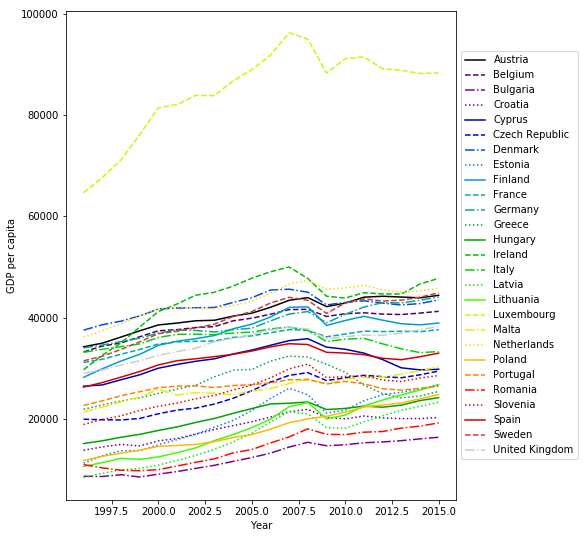

In [20]:
gdp_plot = making_plots(gdp, "GDP per capita")

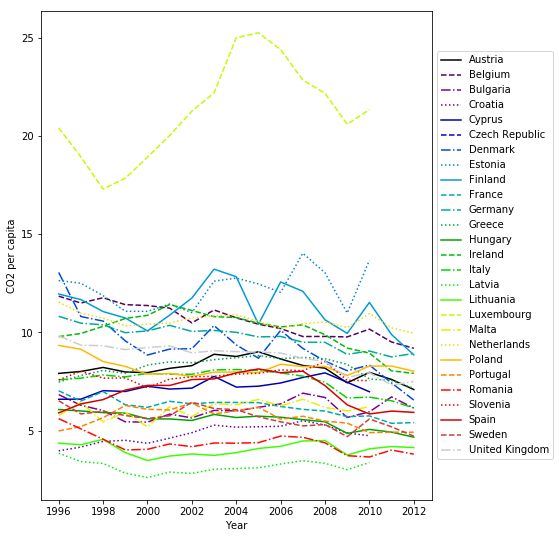

In [21]:
CO2_plot = making_plots(CO2, "CO2 per capita")

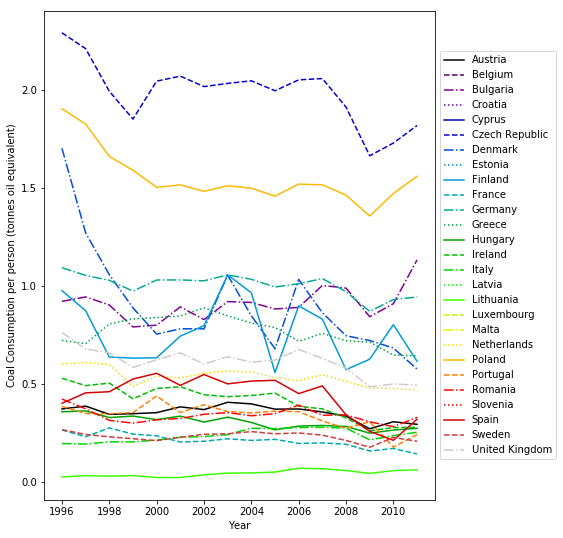

In [22]:
coal_plot = making_plots(coal, "Coal Consumption per person (tonnes oil equivalent)")

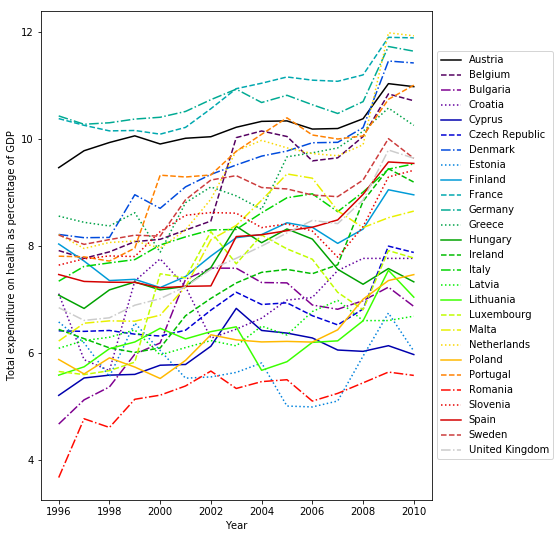

In [23]:
total_health_plot = making_plots(total_health, "Total expenditure on health as percentage of GDP")

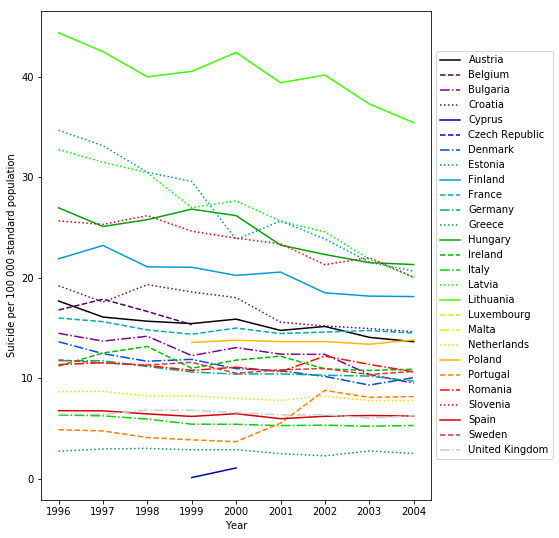

In [24]:
suicide_plot = making_plots(suicide, "Suicide per 100 000 standard population")

In the cell bellow, we just calculate the correlation coefficients between the average values (over all EU countrie per every year) between every pair of indicators. We see some strong coefficients (close to 1 or -1) between some pairs, but many more details are needed to make some general conclusions. Also, it is not clear how joining the EU affects individual contries. For example, Hungary joined the EU during 2004, but we can see the tendency of growth of its GDP even earlier.

It is just curious to notice that the global financial crisis during the end of 2008 and beginning of 2009 affected also the GDP of EU countrie, which is easily visible in the GDP plot.

In [25]:
dataframe_average_values.corr()

,gdp_average,CO2_average,coal_average,total_health_average,suicide_average
gdp_average,1.000000,-0.285812,-0.678612,0.857775,-0.975088
CO2_average,-0.285812,1.000000,0.703723,-0.256248,-0.140213
coal_average,-0.678612,0.703723,1.000000,-0.745688,0.567858
total_health_average,0.857775,-0.256248,-0.745688,1.000000,-0.928267
suicide_average,-0.975088,-0.140213,0.567858,-0.928267,1.000000


#### Problem 2 - Food and drink consumption

First, we follow the same procedure as in Problem 1 - import the needed excel tables as dataframes, selecting the names of EU countries and time interval, choosing the index column to be the column with the names of the countries and title it properly.

We use the following data:
- sugar_consumption.xlsx
- food_consumption.xlsx
- blood_pressure_female.xlsx
- blood_pressure_male.xlsx

Then, we create some tables - one with minimum and maximum values of the variables and their corresponding years and countries; one with average and one with median values of the variables per every year; one with correlation coefficients of the variables for every country, and finaly the plots with the time variability of the indicators.

(Unfortunately, the table related to the alcohol consumption data is almost empty!)

In [40]:
sugar_consumption = pd.read_excel("2. FoodAndDrink/sugar_consumption.xlsx")
sugar_consumption.index.name = 'country'
sugar_consumption = sugar_consumption.loc[names_countries_EU]

sugar_consumption = sugar_consumption[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]]
sugar_consumption

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,1996,1997,1998,1999,2000,2001,2002,2003,2004
country,,,,,,,,,
Austria,128.77,126.03,123.29,123.29,126.03,123.29,120.55,123.29,123.29
Belgium,131.51,131.51,139.73,139.73,161.64,156.16,147.95,150.69,150.69
Bulgaria,76.71,76.71,76.71,82.19,76.71,79.45,79.45,79.45,79.45
Croatia,126.03,106.85,101.37,104.11,123.29,153.43,161.64,164.38,164.38
Cyprus,112.33,112.33,112.33,115.07,123.29,120.55,123.29,128.77,128.77
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,131.51,145.21,136.99,134.25,145.21,142.47,161.64,158.90,158.90
Estonia,90.41,101.37,98.63,136.99,147.95,150.69,153.43,167.12,167.12
Finland,101.37,104.11,98.63,98.63,104.11,93.15,93.15,93.15,93.15


In [41]:
food_consumption = pd.read_excel("2. FoodAndDrink/food_consumption.xlsx")
food_consumption.index.name = 'country'
food_consumption = food_consumption.loc[names_countries_EU]

food_consumption = food_consumption[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]]
food_consumption

KeyError: "None of [['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']] are in the [index]"

In [37]:
blood_pressure_female = pd.read_excel("2. FoodAndDrink/blood_pressure_female.xlsx")
blood_pressure_female = blood_pressure_female.rename(columns = {'SBP female (mm Hg), age standardized mean':'country'})
blood_pressure_female = blood_pressure_female.set_index('country')

blood_pressure_female = blood_pressure_female.loc[names_countries_EU]

blood_pressure_female = blood_pressure_female[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]]
blood_pressure_female

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,
Austria,128.2032,127.7780,127.3255,126.9249,126.5802,126.2368,125.8685,125.5557,125.3059,124.9986,124.7208,124.4409,124.1394
Belgium,127.6490,127.3112,126.8588,126.3954,125.9174,125.3979,124.8811,124.3810,123.8587,123.3324,122.8311,122.3231,121.8227
Bulgaria,130.8670,130.5253,130.1908,129.9074,129.6648,129.4689,129.3342,129.2288,129.0796,128.9309,128.7614,128.6203,128.4721
Croatia,132.4040,132.2098,132.0565,131.9161,131.7474,131.5993,131.4386,131.2982,131.0964,130.9106,130.7402,130.5685,130.3921
Cyprus,126.7186,126.3746,126.0223,125.6878,125.3252,124.9350,124.5562,124.1485,123.7910,123.4697,123.2031,122.9174,122.6309
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,124.4529,124.0879,123.6697,123.2706,122.8896,122.4678,122.0758,121.6822,121.2744,120.8508,120.4327,119.9982,119.5815
Estonia,130.8985,130.7004,130.4832,130.2793,130.1854,130.1075,129.9921,129.8773,129.7590,129.6701,129.5979,129.5624,129.5161
Finland,131.4140,130.9147,130.3987,129.9365,129.4930,129.0869,128.6964,128.3291,127.9756,127.6283,127.2743,126.9188,126.5645


In [38]:
blood_pressure_male = pd.read_excel("2. FoodAndDrink/blood_pressure_male.xlsx")
blood_pressure_male = blood_pressure_male.rename(columns = {'SBP male (mm Hg), age standardized mean':'country'})
blood_pressure_male = blood_pressure_male.set_index('country')

blood_pressure_male = blood_pressure_male.loc[names_countries_EU]

blood_pressure_male = blood_pressure_male[[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]]
blood_pressure_male

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,
Austria,133.7404,133.5510,133.2813,133.0395,132.7926,132.5685,132.3738,132.1894,131.9882,131.8182,131.6584,131.5106,131.3600
Belgium,132.3982,132.1080,131.8228,131.5300,131.1885,130.8542,130.4967,130.1357,129.7849,129.4407,129.1350,128.8279,128.5194
Bulgaria,134.4704,134.2704,134.0941,133.9403,133.8580,133.8393,133.8270,133.8166,133.8564,133.9319,134.0152,134.1078,134.1873
Croatia,136.0952,135.9215,135.7684,135.6513,135.6015,135.5690,135.5528,135.5491,135.5333,135.5197,135.4902,135.5184,135.5312
Cyprus,132.3387,132.2133,132.1085,131.9850,131.8844,131.8108,131.7244,131.6387,131.5760,131.4983,131.3931,131.3033,131.2014
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,132.1671,132.0016,131.8008,131.6001,131.4212,131.2264,131.0406,130.8202,130.5846,130.3788,130.1517,129.9675,129.7452
Estonia,137.5791,137.3750,137.2467,137.2598,137.2657,137.3330,137.4876,137.6647,137.8867,138.0838,138.2799,138.4413,138.5625
Finland,135.9584,135.6234,135.3588,135.1078,134.9202,134.8001,134.7557,134.7676,134.8243,134.9073,135.0228,135.1586,135.2823


In [39]:
# Create a table with minimum and maximum values.
dataframes_food = [sugar_consumption, food_consumption, blood_pressure_female, blood_pressure_male]

dataframe_food_min_max = pd.DataFrame(columns=['min_value', 'year_min', 'country_min', 'max_value', 'year_max', 'country_max', 'percent, %'], index=['sugar_consumption', 'food_consuption', 'blood_pressure_female', 'blood_pressure_male'])


for features_food, names_df_food in zip(dataframe_food_min_max.index, dataframes_food):
    dataframe_food_min_max.loc[features_food] = pd.Series({'min_value':names_df_food.min().min(), 'year_min':names_df_food.min().idxmin(), 'country_min':names_df_food.min(axis=1).idxmin(), 'max_value':names_df_food.max().max(), 'year_max':names_df_food.max().idxmax(), 'country_max':names_df_food.max(axis=1).idxmax(), 'percent, %':float(names_df_food.max().max() - names_df_food.min().min())/float(names_df_food.min().min()) * 100})
        


# Highlight rows for which the maximum values appear earlier in time compare to minimum values

dataframe_food_min_max.style.apply(highlight_row, axis=1)

TypeError: '<=' not supported between instances of 'str' and 'float'

Compared to the same table in Problem 1, in this table we notice that the percentage increase / decrease (the one yellow row) are smaller - from several percents to several hundred persents. The percentage increase of the sugar consumption is very disturbing tendency.

The next two tables with average and median values show the following tendencies - increases of sugar and food (calories) consumption, and decreases of the blood pressure for both males and females with the time.

In [25]:
# Create a table with average values for every variable (sugar_consumption, food_consumption, blood_pressure_female, blood_pressure_male), averaged over one year and all the 27 countries from EU.
dataframe_average_food = pd.DataFrame(columns=['sugar_consumption_average', 'food_consumption_average', 'blood_pressure_female_average', 'blood_pressure_male_average'], index=[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

dataframe_average_food['sugar_consumption_average'] = np.round(sugar_consumption.mean(), 2)
dataframe_average_food['food_consumption_average'] = np.round(food_consumption.mean(), 2)
dataframe_average_food['blood_pressure_female_average'] = np.round(blood_pressure_female.mean(), 2)
dataframe_average_food['blood_pressure_male_average'] = np.round(blood_pressure_male.mean(), 2)

dataframe_average_food

,sugar_consumption_average,food_consumption_average,blood_pressure_female_average,blood_pressure_male_average
1996,104.66,3259.93,129.13,134.35
1997,105.75,3252.73,128.80,134.17
1998,106.08,3289.87,128.44,134.01
1999,107.18,3322.01,128.11,133.86
2000,110.14,3331.30,127.80,133.73
2001,112.66,3351.69,127.48,133.62
2002,112.33,3367.79,127.18,133.52
2003,114.19,3357.65,126.88,133.42
2004,114.19,3382.19,126.59,133.34
2005,NaN,3381.11,126.30,133.26


In [26]:
# Create a table with median values for every variable (sugar_consumption, food_consumption, blood_pressure_female, blood_pressure_male), medianed over one year and all the 27 countries from EU.
dataframe_median_food = pd.DataFrame(columns=['sugar_consumption_median', 'food_consumption_median', 'blood_pressure_female_median', 'blood_pressure_male_median'], index=[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

dataframe_median_food['sugar_consumption_median'] = np.round(sugar_consumption.median(), 2)
dataframe_median_food['food_consumption_median'] = np.round(food_consumption.median(), 2)
dataframe_median_food['blood_pressure_female_median'] = np.round(blood_pressure_female.median(), 2)
dataframe_median_food['blood_pressure_male_median'] = np.round(blood_pressure_male.median(), 2)

dataframe_median_food

,sugar_consumption_median,food_consumption_median,blood_pressure_female_median,blood_pressure_male_median
1996,106.85,3275.36,129.91,134.06
1997,106.85,3302.67,129.56,133.81
1998,104.11,3354.91,129.17,133.63
1999,109.59,3371.48,128.69,133.49
2000,115.07,3374.10,128.22,133.35
2001,117.81,3379.52,127.74,133.31
2002,115.07,3402.95,127.24,133.33
2003,115.07,3392.18,126.71,133.17
2004,115.07,3441.88,126.18,132.96
2005,NaN,3397.48,125.68,132.78


In [27]:
# Calculating the correlation coefficients for all the variables with time for every country from the list.
sugar_consumption_cor_coef = calculating_corr_coef(sugar_consumption.T.reset_index())
food_consumption_cor_coef = calculating_corr_coef(food_consumption.T.reset_index())
blood_pressure_female_cor_coef = calculating_corr_coef(blood_pressure_female.T.reset_index())
blood_pressure_male_cor_coef = calculating_corr_coef(blood_pressure_male.T.reset_index())


data_coefficients_food = pd.concat([sugar_consumption_cor_coef, food_consumption_cor_coef, blood_pressure_female_cor_coef, blood_pressure_male_cor_coef], axis=1)
data_coefficients_food.columns = ['sugar_consumption_cor_coef', 'food_consumption_cor_coef', 'blood_pressure_female_cor_coef', 'blood_pressure_male_cor_coef']
data_coefficients_food

,sugar_consumption_cor_coef,food_consumption_cor_coef,blood_pressure_female_cor_coef,blood_pressure_male_cor_coef
index,1.00,1.00,1.00,1.00
Austria,-0.69,0.46,-1.00,-1.00
Belgium,0.72,0.58,-1.00,-1.00
Bulgaria,0.52,-0.05,-0.98,-0.31
Croatia,0.84,0.94,-1.00,-0.83
Cyprus,0.95,-0.48,-1.00,-1.00
Czech Republic,NaN,NaN,NaN,NaN
Denmark,0.84,0.70,-1.00,-1.00
Estonia,0.95,0.55,-0.98,0.88
Finland,-0.79,0.73,-1.00,-0.50


From the table with the correlation coefficients for every country we see that the sugar consumption increases with time for almost all countries, except for Austria, Finland, Hungary, Latvia, Malta and Slovenie. The food consumption also shows positive correlation for the countries, except for 6 countries. The blood pressure of males and females show very strong negative correlation with time. We will inspect some correlations with other variables later.

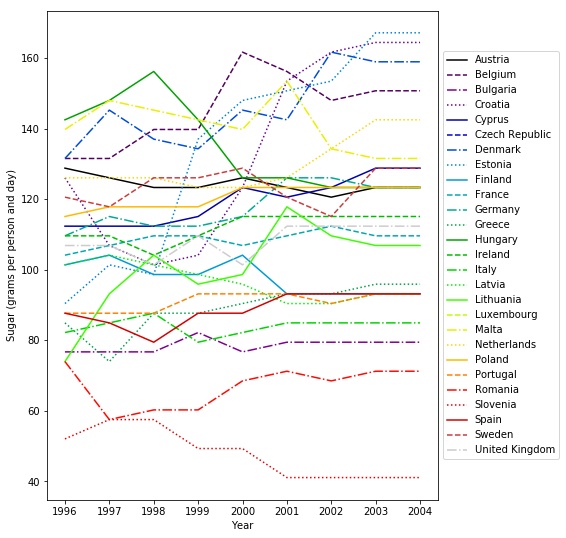

In [28]:
sugar_consumption_plot = making_plots(sugar_consumption, "Sugar (grams per person and day)")

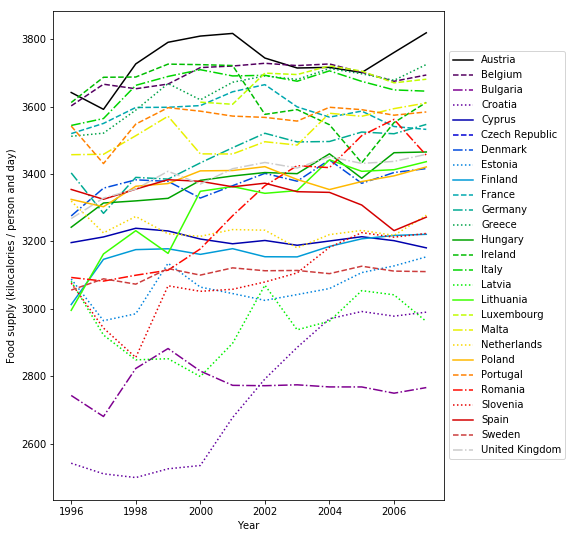

In [29]:
food_consumption_plot = making_plots(food_consumption, "Food supply (kilocalories / person and day)")

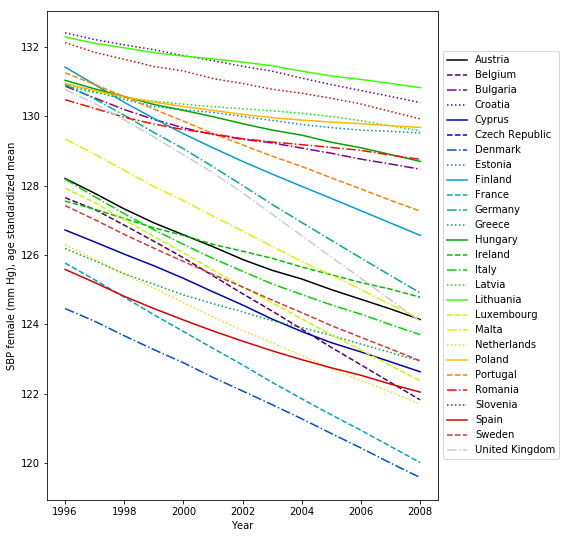

In [30]:
blood_pressure_female_plot = making_plots(blood_pressure_female, "SBP female (mm Hg), age standardized mean")

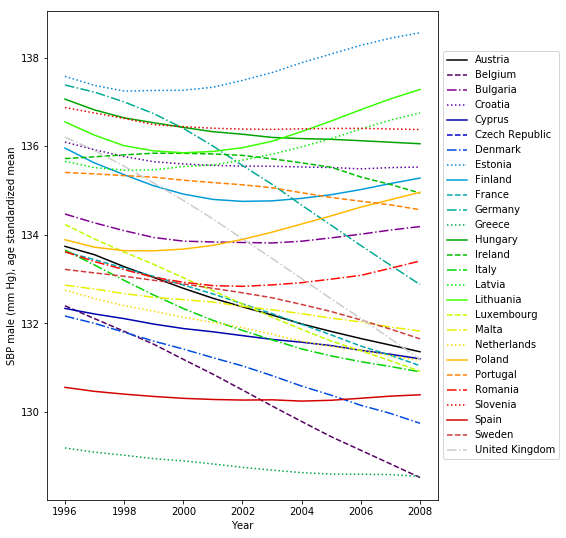

In [31]:
blood_pressure_male_plot = making_plots(blood_pressure_male, "SBP male (mm Hg), age standardized mean")

In [32]:
dataframe_average_food.corr()

,sugar_consumption_average,food_consumption_average,blood_pressure_female_average,blood_pressure_male_average
sugar_consumption_average,1.000000,0.938931,-0.973199,-0.968089
food_consumption_average,0.938931,1.000000,-0.957490,-0.976602
blood_pressure_female_average,-0.973199,-0.957490,1.000000,0.991276
blood_pressure_male_average,-0.968089,-0.976602,0.991276,1.000000


The correlation coefficients between the averaged values over the EU from the table above show that in general for EU sitizens the sugar and food consumption increases with time while people blood pressure decreases. This result is a little bit strange, since all medical science papers say that increasing the amount of sugar we consume, increases the systolic blood pressure, it is dangerous for the heart and it links to a lot of other diseases. Maybe averaging the values for all the countries corrupts these strange tendencies, so let's check the correlations between sugar and food consumption, and the blood pressure for every single country itself.

In [33]:
# Correlations between sugar and food consumption, and blood pressure for every single country.
def cor_coef_every_country(df1, df2):
    cor_series = pd.Series()
    for column1, column2 in zip(df1.columns, df2.columns):
        cor_series = cor_series.append(pd.Series(df1[column1].corr(df2[column2]), index=[column1]))
    return cor_series



sugar_blood_female_cor = cor_coef_every_country(sugar_consumption.T, blood_pressure_female.T)
sugar_blood_male_cor = cor_coef_every_country(sugar_consumption.T, blood_pressure_male.T)
food_blood_female_cor = cor_coef_every_country(food_consumption.T, blood_pressure_female.T)
food_blood_male_cor = cor_coef_every_country(food_consumption.T, blood_pressure_male.T)



df_sugar_food_blood = pd.concat([sugar_blood_female_cor, sugar_blood_male_cor, food_blood_female_cor, food_blood_male_cor], axis=1)
df_sugar_food_blood.columns = ['sugar_blood_female_cor', 'sugar_blood_male_cor', 'food_blood_female_cor', 'food_blood_male_cor']
df_sugar_food_blood

,sugar_blood_female_cor,sugar_blood_male_cor,food_blood_female_cor,food_blood_male_cor
Austria,0.717044,0.694357,-0.494266,-0.488835
Belgium,-0.704790,-0.702591,-0.555386,-0.566060
Bulgaria,-0.552053,-0.576236,-0.063976,-0.433445
Croatia,-0.826035,-0.589090,-0.939845,-0.713430
Cyprus,-0.950925,-0.941759,0.484319,0.470532
Czech Republic,NaN,NaN,NaN,NaN
Denmark,-0.838736,-0.835729,-0.700491,-0.696755
Estonia,-0.963653,0.400357,-0.518424,0.627368
Finland,0.783889,0.687062,-0.749978,-0.661115
France,-0.685562,-0.668505,0.033828,0.093386


Hm, so almost all coefficients for every single country has a negative sign, which really means that even the consumption of sugar and food increases, the people blood presure decreases. Maybe people do more sport and pay more for healt. Let's go futher and check these health indicators with some economics indicators from Problem 1 with time for every single country.

In [34]:
# Correlation coefficients between different indicators from Problems 1 & 2 for every country itself.
sugar_total_health = cor_coef_every_country(sugar_consumption.T, total_health.T)
sugar_gdp = cor_coef_every_country(sugar_consumption.T, gdp.T)
sugar_suicide = cor_coef_every_country(sugar_consumption.T, suicide.T)
sugar_blood_female = cor_coef_every_country(sugar_consumption.T, blood_pressure_female.T)
sugar_blood_male = cor_coef_every_country(sugar_consumption.T, blood_pressure_male.T)
food_gdp = cor_coef_every_country(sugar_consumption.T, food_consumption.T)


df_problem_1_2 = pd.concat([sugar_total_health, sugar_gdp, sugar_suicide, sugar_blood_female, sugar_blood_male, food_gdp], axis=1)
df_problem_1_2.columns = ['sugar_total_health', 'sugar_gdp', 'sugar_suicide', 'sugar_blood_female', 'sugar_blood_male', 'food_gdp']
df_problem_1_2

,sugar_total_health,sugar_gdp,sugar_suicide,sugar_blood_female,sugar_blood_male,food_gdp
Austria,-0.773031,-0.706223,0.733886,0.717044,0.694357,-0.468386
Belgium,0.422143,0.815123,-0.284209,-0.704790,-0.702591,0.830011
Bulgaria,0.569659,0.304552,-0.608854,-0.552053,-0.576236,0.518543
Croatia,0.076296,0.853731,-0.915557,-0.826035,-0.589090,0.917555
Cyprus,0.905697,0.955765,0.599130,-0.950925,-0.941759,-0.600350
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,0.759827,0.749165,-0.841792,-0.838736,-0.835729,0.657368
Estonia,-0.467584,0.903464,-0.953389,-0.963653,0.400357,0.275586
Finland,-0.422353,-0.741743,0.779648,0.783889,0.687062,-0.361702
France,0.296670,0.701076,-0.856886,-0.685562,-0.668505,0.826580


In the table above we present the correlation coefficients for every country between different health and economics indicators. We see that the countries show variable values for the coefficints even in one column. This means that even being in a Union, every coutry has its own health and economics politics.

Because of this conclusion, we will make some plots with linear regression between two indicators individually for a couple of countries. We present also the corresponding R^2 values.

In [35]:
# A function, which plots linear regression model between two indicators for one country.
def making_lin_reg_plots(df11, df22, name_country, iloc_value, x_label, y_label):
    x0 = df11.T
    y0 = df22.T
    
    x = x0[name_country].iloc[:iloc_value]
    y = y0[name_country].iloc[:iloc_value]
    
    x = x.values.reshape(len(x),1)
    y = y.values.reshape(len(y),1)
    
    model = LinearRegression()
    model.fit(x, y)
    #print(model.coef_, model.intercept_)
    r_2 = model.score(x, y)
    
    plt.scatter(x, y, color='black')
    plt.plot(x, model.predict(x), color='blue', linewidth=3)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('{} , R^2 = {}'.format(name_country, r_2))
    plt.show()

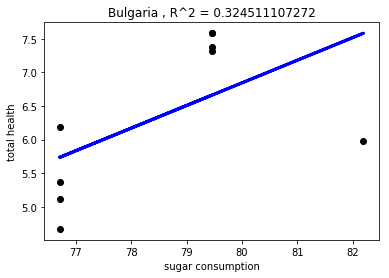

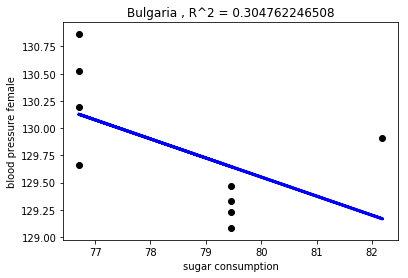

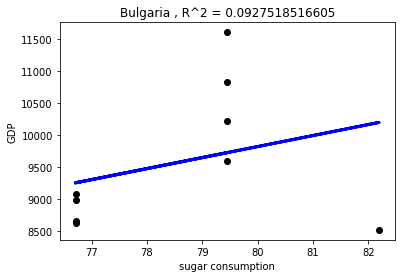

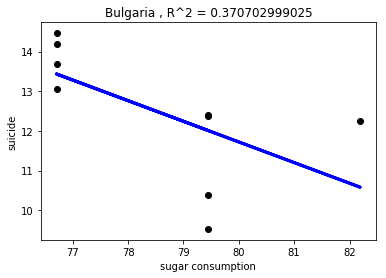

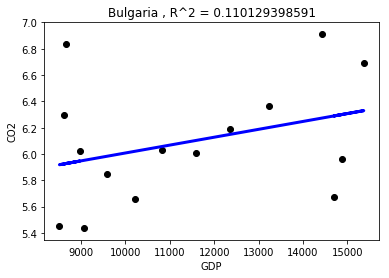

In [36]:
# Plots for Bulgaria
making_lin_reg_plots(sugar_consumption, total_health, 'Bulgaria', 9, 'sugar consumption', 'total health')
making_lin_reg_plots(sugar_consumption, blood_pressure_female, 'Bulgaria', 9, 'sugar consumption', 'blood pressure female')
making_lin_reg_plots(sugar_consumption, gdp, 'Bulgaria', 9, 'sugar consumption', 'GDP')
making_lin_reg_plots(sugar_consumption, suicide, 'Bulgaria', 9, 'sugar consumption', 'suicide')
making_lin_reg_plots(gdp, CO2, 'Bulgaria', 15, 'GDP', 'CO2')

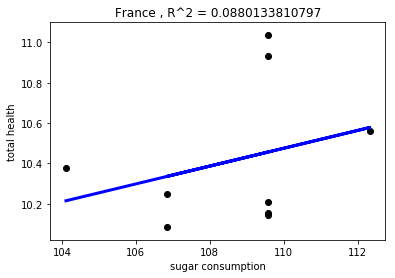

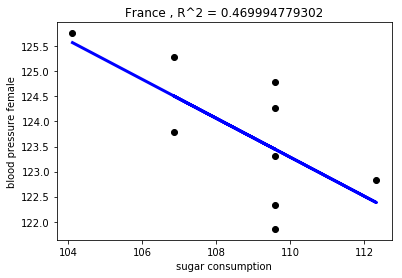

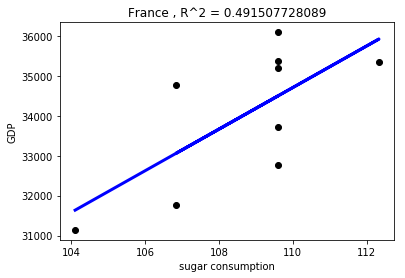

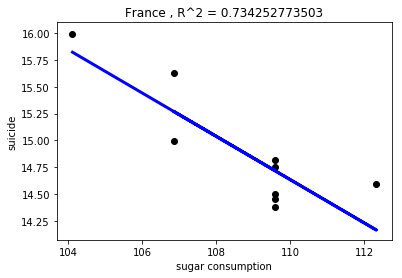

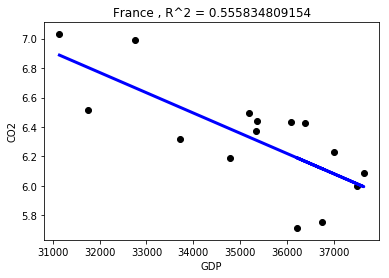

In [37]:
# Plots for France
making_lin_reg_plots(sugar_consumption, total_health, 'France', 9, 'sugar consumption', 'total health')
making_lin_reg_plots(sugar_consumption, blood_pressure_female, 'France', 9, 'sugar consumption', 'blood pressure female')
making_lin_reg_plots(sugar_consumption, gdp, 'France', 9, 'sugar consumption', 'GDP')
making_lin_reg_plots(sugar_consumption, suicide, 'France', 9, 'sugar consumption', 'suicide')
making_lin_reg_plots(gdp, CO2, 'France', 15, 'GDP', 'CO2')

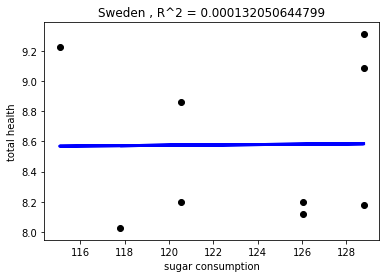

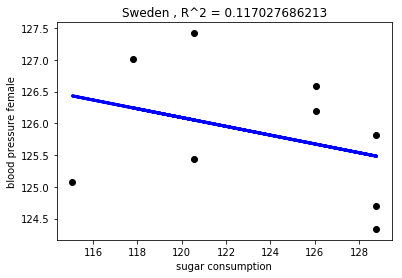

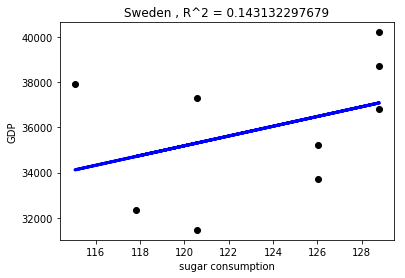

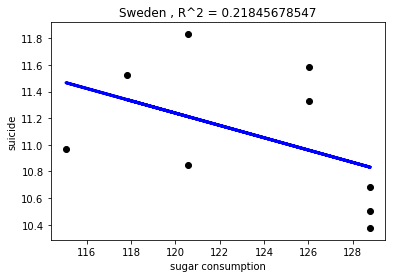

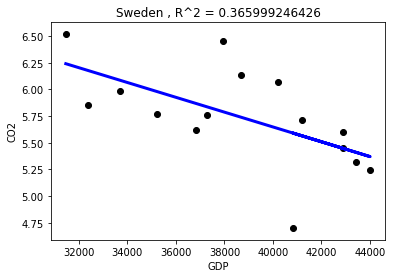

In [38]:
# Plots for Sweden
making_lin_reg_plots(sugar_consumption, total_health, 'Sweden', 9, 'sugar consumption', 'total health')
making_lin_reg_plots(sugar_consumption, blood_pressure_female, 'Sweden', 9, 'sugar consumption', 'blood pressure female')
making_lin_reg_plots(sugar_consumption, gdp, 'Sweden', 9, 'sugar consumption', 'GDP')
making_lin_reg_plots(sugar_consumption, suicide, 'Sweden', 9, 'sugar consumption', 'suicide')
making_lin_reg_plots(gdp, CO2, 'Sweden', 15, 'GDP', 'CO2')

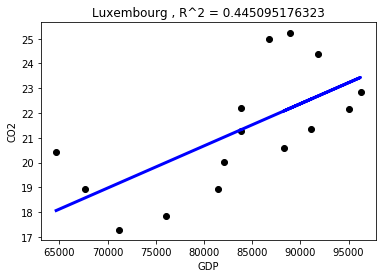

In [62]:
# Plot for Luxembourg
making_lin_reg_plots(gdp, CO2, 'Luxembourg', 15, 'GDP', 'CO2')

Since we can't produce here these nice plots for every country from EU (the reader can play with other names, if he wants), we just show the plots for three countries - Bulgaria, France and Sweden. Bulgaria is the country with the lowest value of GDP since a lot of years. We wanted to compare these plots with the results from Luxembourg (the country with the highest value of GDP), but there were no data for its sugar consumption variable. It is obvious that for Bulgaria there are no strong correlations between any pairs of variables (we belong to the chaos :) ). Sweden also does not show strong correlations. France shows an intersting correlation - eating more sweet food reduces the suicide incidents. We are not sure that the doctors will agree with that conclusion, but maybe eating sweet food produces more hormons of happiness :). 

#### Problem 3

After inspecting the data about USA, we decided to use only three columns from the table:
- tucaseid - contains the year and months
- eeincome1 - it containes the answer to the question "Last month, was your total household income before taxes more or less than (amount) per month?". The possible options are as follows: 1 - Income > 185 % of poverty threshold; 2 - Income < 185 % of poverty threshold; 3 - Income = 185 % of poverty threshold.
- eudietsoda - it contains the answer to the question "Was the soft drink diet, regular or did you have both kinds?" with the possible options: 1 - Diet; 2 - Regular; 3 - Both.

We will link the drinking of the soda, which contains sugar, with the consumption of sugar by EU citizens. The problem is that the USA data is valid only for 2014, while the EU data is valid only between 1996 to 2004, but will keep that in mind.

In [39]:
usa_data = pd.read_csv('3. USA/ehresp_2014.csv')
usa_data.head()

,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [40]:
usa_data.shape

(11212, 37)

In [41]:
# Here, we create an array to check whether the year is only 2014.
s = usa_data['tucaseid'].values/10000000000
s

array([2014, 2014, 2014, ..., 2014, 2014, 2014], dtype=int64)

In [42]:
# We count the 2014 value for the year (it is equal to the length of the dataframe, so it is ok).
np.count_nonzero(s == 2014)

11212

In [43]:
usa_data['tucaseid'].dtype

dtype('int64')

In [44]:
usa_data['eeincome1'].value_counts()

 1    6990
 2    3454
 3     452
-2     155
-3     140
-1      21
Name: eeincome1, dtype: int64

In [45]:
usa_data['eudietsoda'].value_counts()

-1    8169
 2    1780
 1    1181
 3      76
-2       4
-3       2
Name: eudietsoda, dtype: int64

Well, for the valid answers there are only three options as we mentioned above for the both variables 'eeincome1' and 'eudietsoda'. The other three values with the negative signes have the following meanings: (-1) - Blank; (-2) - Don’t know; (-3) - Refused.

We will delete all the rows with these negative values. Let's first select only the three columns we need.

In [46]:
usa_data = usa_data[['tucaseid', 'eeincome1', 'eudietsoda']]

In [47]:
# Delete the rows with negative values.
usa_data = usa_data[usa_data['eeincome1'] != -1]
usa_data = usa_data[usa_data['eeincome1'] != -2]
usa_data = usa_data[usa_data['eeincome1'] != -3]

In [58]:
usa_data['eeincome1'].unique()

array([1, 2, 3], dtype=int64)

In [48]:
# Delete the rows with negative values.
usa_data = usa_data[usa_data['eudietsoda'] != -1]
usa_data = usa_data[usa_data['eudietsoda'] != -2]
usa_data = usa_data[usa_data['eudietsoda'] != -3]

In [59]:
usa_data['eudietsoda'].unique()

array(['Diet', 'Regular', 'Both'], dtype=object)

In [49]:
# Here, we create a new column, which contains the months.
usa_data['month'] = usa_data['tucaseid'] - 20140000000000
usa_data['month'] = usa_data['month'].values / 100000000

In [50]:
usa_data['month'].value_counts().sort_index()

1     231
2     253
3     293
4     209
5     262
6     292
7     206
8     236
9     275
10    215
11    245
12    238
Name: month, dtype: int64

In [51]:
# Replace the numbers in the column about the type soda people drink with the corresponding string.
usa_data['eudietsoda'] = usa_data['eudietsoda'].replace(1, 'Diet')
usa_data['eudietsoda'] = usa_data['eudietsoda'].replace(2, 'Regular')
usa_data['eudietsoda'] = usa_data['eudietsoda'].replace(3, 'Both')

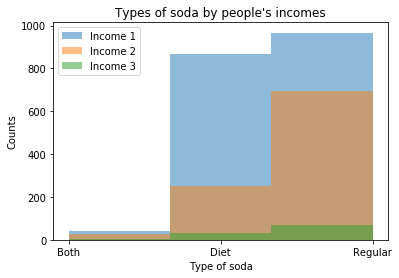

In [61]:
# Create a histogram by the types of soda, which people drink based on their incomes.

diet_soda_by_incomes = usa_data.groupby('eeincome1',as_index=True)['eudietsoda']

for income, soda in diet_soda_by_incomes:
    plt.hist(soda, label = "Income {}".format(income), bins=3, alpha = 0.5)
plt.title("Types of soda by people's incomes")
plt.xlabel("Type of soda")
plt.ylabel("Counts")
plt.legend()
#plt.legend(["Income > 185 %", "Income < 185 %", "Income = 185 %"])
plt.show()

Let recall the meaning of the income symbols:
- 1 - Income > 185 % of poverty threshold;
- 2 - Income < 185 % of poverty threshold;
- 3 - Income = 185 % of poverty threshold.

In [53]:
# These numbers correspond to the histogram above.

usa_data.groupby('eeincome1',as_index=True)['eudietsoda'].value_counts()

eeincome1  eudietsoda
1          Regular       967
           Diet          868
           Both           42
2          Regular       697
           Diet          249
           Both           25
3          Regular        68
           Diet           34
           Both            5
Name: eudietsoda, dtype: int64

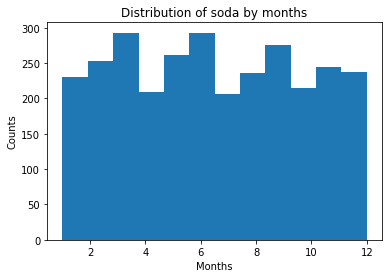

In [54]:
# A histogram of drinking soda by months.

plt.hist(usa_data['month'], bins=12)
plt.title("Distribution of soda by months")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.show()

In [55]:
# These numbers correspond to the histogram above.

usa_data['month'].value_counts().sort_index()

1     231
2     253
3     293
4     209
5     262
6     292
7     206
8     236
9     275
10    215
11    245
12    238
Name: month, dtype: int64

The two histograms show that nevertheless the income is, people prefer to drink regular soda. Maybe its taste is better that the diet soda. It is also visible that people prefer either the regular one or the diet one, but they almost don't dont consume both of them. Since the three income groups are not equal by length, we can't say the wealthier people consume more soda than the other.

The second histogram is very simple and present the sumation of the trhree types of soda per month during the whole 2014. It is visible that people consume soda almost the same amount during the year unaffected by the season.

Obviously, we can't compare the USA data with EU data, because the two datasets are not equal in time period and sugar consumption amount. We can only say that more people from EU consume more and more total amount of sugar every year, while the USA citizens at least keep the same amount of soda drinks and they make difference between regular and diet drinks.